In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

In [2]:
np.random.seed(42)

In [10]:
values= np.random.randn(366)
dates= pd.date_range(start='2023-01-01',end='2024-01-01',freq='D')

In [12]:
df= pd.DataFrame(data=values,index=dates,columns=['Value'])

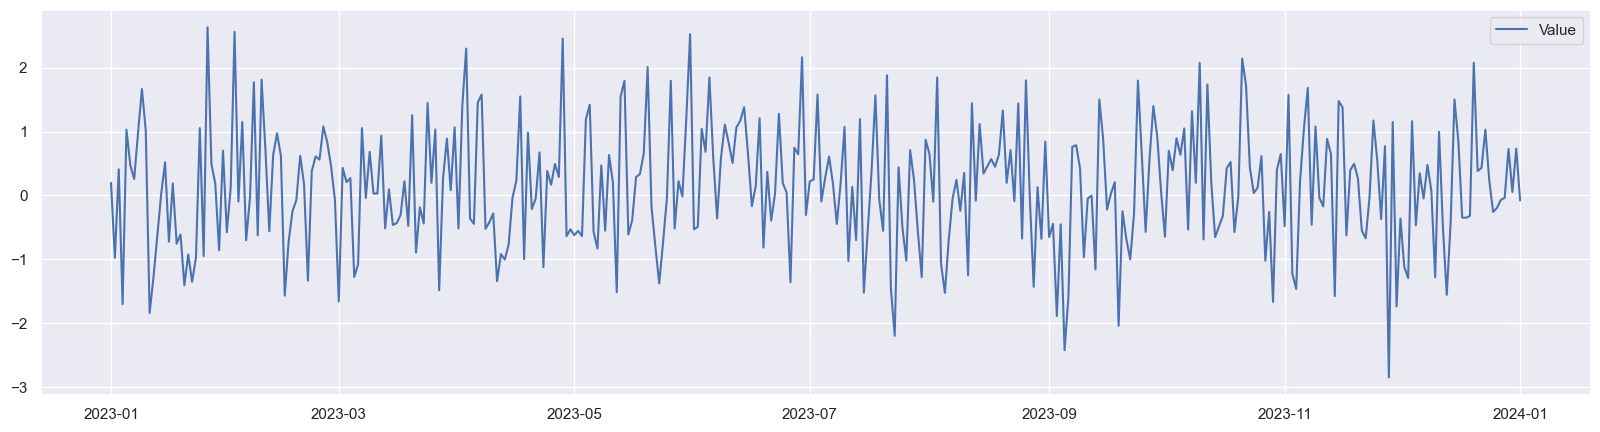

In [20]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df)
plt.show()

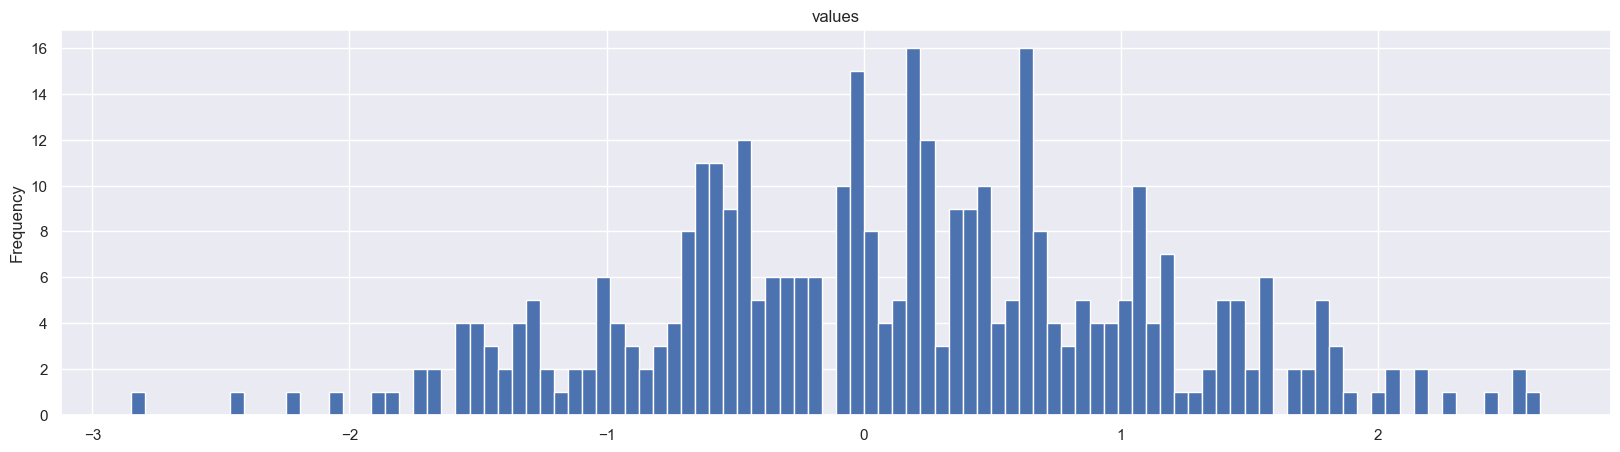

In [25]:
plt.figure(figsize=(20,5))
df.Value.plot(kind='hist',bins=100,title='values')
plt.show()

creating more features

In [29]:
df['year']= df.index.year
df['month']= df.index.month
df["day"]=df.index.day
df["dayofyear"]=df.index.day_of_year
df['dayofweek']=df.index.day_of_week
df.head()

,Value,year,month,day,dayofyear,dayofweek,weekday
2023-01-01,0.195845,2023,1,1,1,6,6
2023-01-02,-0.978373,2023,1,2,2,0,0
2023-01-03,0.408253,2023,1,3,3,1,1
2023-01-04,-1.702584,2023,1,4,4,2,2
2023-01-05,1.029156,2023,1,5,5,3,3


creating, lag, sliding window and expanding window

In [35]:
df['lag1']= df.Value.shift(1)
df['lag10']=df.Value.shift(10)
df["rollingmean10"]= df.Value.rolling(10).mean()
df['rollingstd10']=df.Value.rolling(10).std()
df['rollingmin5']=df.Value.rolling(5).min()
df['rollingmax10']=df.Value.rolling(5).max()
df["expmean"]=df.Value.expanding().mean()
df["expstd"]=df.Value.expanding().std()
df["expmax"]=df.Value.expanding().max()
df["expmin"]=df.Value.expanding().min()

df.head(20)

,Value,year,month,day,dayofyear,dayofweek,weekday,lag1,lag10,rollingmean10,rollingstd10,rollingmin5,rollingmax10,expmean,expstd,expmax,expmin
2023-01-01,0.195845,2023,1,1,1,6,6,NaN,NaN,NaN,NaN,NaN,NaN,0.195845,NaN,0.195845,0.195845
2023-01-02,-0.978373,2023,1,2,2,0,0,0.195845,NaN,NaN,NaN,NaN,NaN,-0.391264,0.830298,0.195845,-0.978373
2023-01-03,0.408253,2023,1,3,3,1,1,-0.978373,NaN,NaN,NaN,NaN,NaN,-0.124758,0.746842,0.408253,-0.978373
2023-01-04,-1.702584,2023,1,4,4,2,2,0.408253,NaN,NaN,NaN,NaN,NaN,-0.519215,0.997112,0.408253,-1.702584
2023-01-05,1.029156,2023,1,5,5,3,3,-1.702584,NaN,NaN,NaN,-1.702584,1.029156,-0.209541,1.106871,1.029156,-1.702584
2023-01-06,0.472597,2023,1,6,6,4,4,1.029156,NaN,NaN,NaN,-1.702584,1.029156,-0.095851,1.028437,1.029156,-1.702584
2023-01-07,0.256030,2023,1,7,7,5,5,0.472597,NaN,NaN,NaN,-1.702584,1.029156,-0.045582,0.948204,1.029156,-1.702584
2023-01-08,0.982691,2023,1,8,8,6,6,0.256030,NaN,NaN,NaN,-1.702584,1.029156,0.082952,0.950167,1.029156,-1.702584
2023-01-09,1.665474,2023,1,9,9,0,0,0.982691,NaN,NaN,NaN,0.256030,1.665474,0.258788,1.033552,1.665474,-1.702584
2023-01-10,1.014370,2023,1,10,10,1,1,1.665474,NaN,0.334346,1.003309,0.256030,1.665474,0.334346,1.003309,1.665474,-1.702584


[]

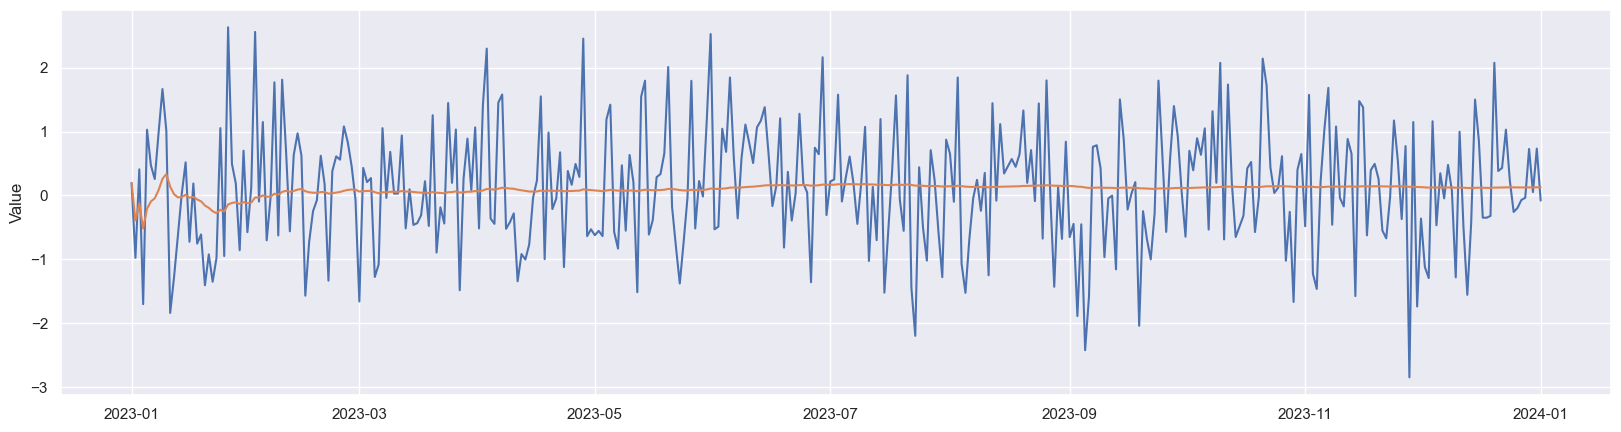

In [46]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df.index,y=df.Value,data=df)
sns.lineplot(x=df.index,y=df.expmean,data=df)
plt.plot()